# INDEX
1. [Load and Chek the Dataset](#sec1)
    * [1.1  Show a basic info](#sec1.1)  
    * [1.2 Show the data types](#sec1.2)
    * [1.3 Missing values](#sec1.3)
2. [Exploratory Data Analysis](#sec2)
    * [2.1 Target Variable analysis](#sec2.1)
    * [2.2 Restaurant_Id column](#sec2.2)
    * [2.3 City column](#sec2.3)
    * [2.4 Cuisine_style column](#sec2.4)
    * [2.5 Ranking column](#sec2.5)
    * [2.6 Price range column](#sec2.6)
    * [2.8 Reviews column](#sec2.8)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import warnings
from jupyterthemes import jtplot

warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', 50)  # Show more rows
pd.set_option('display.max_columns', 50)  # Show more columns
plt.style.use('ggplot')  # Nice plotting

%matplotlib inline

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

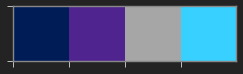

In [2]:
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff']
sns.palplot(sns.color_palette(colors))

<a id="sec1"></a>
# [1.  Load and Chek the Dataset](#sec1)

In [3]:
df = pd.read_csv('anapa_flights.csv')

<a id="sec1.1"></a>
# [1.1  Show a basic info](#sec1.1)

In [4]:
display(df.sample(3))
df.info()

,flight_id,flight_no,arrival_airport,airport_name,city,scheduled_departure,scheduled_arrival,status,arival_longitude,arival_latitude,model,total_seat_cnt,occ_seats,sum_per_flight,time_in_air
104,136219,PG0252,SVO,Sheremetyevo International Airport,Moscow,2016-08-17T10:05:00Z,2016-08-17T11:45:00Z,Arrived,37.4146,55.972599,Boeing 737-300,130,49.0,673400.0,100.0
69,136184,PG0252,SVO,Sheremetyevo International Airport,Moscow,2017-05-08T10:05:00Z,2017-05-08T11:45:00Z,Arrived,37.4146,55.972599,Boeing 737-300,130,130.0,1886000.0,101.0
131,136246,PG0252,SVO,Sheremetyevo International Airport,Moscow,2016-09-12T10:05:00Z,2016-09-12T11:45:00Z,Arrived,37.4146,55.972599,Boeing 737-300,130,107.0,1603000.0,100.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            849 non-null    int64  
 1   flight_no            849 non-null    object 
 2   arrival_airport      849 non-null    object 
 3   airport_name         849 non-null    object 
 4   city                 849 non-null    object 
 5   scheduled_departure  849 non-null    object 
 6   scheduled_arrival    849 non-null    object 
 7   status               849 non-null    object 
 8   arival_longitude     849 non-null    float64
 9   arival_latitude      849 non-null    float64
 10  model                849 non-null    object 
 11  total_seat_cnt       849 non-null    int64  
 12  occ_seats            732 non-null    float64
 13  sum_per_flight       791 non-null    float64
 14  time_in_air          785 non-null    float64
dtypes: float64(5), int64(2), object(8)
memor

<a id="sec1.2"></a>
# [1.2 Show the data types](#sec1.2)

In [5]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column Type']
dtype_df.groupby('Column Type').agg('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,5
2,object,8


In [6]:
for i, j in enumerate(df.columns):
    print(j, type(df.loc[1][i]))

flight_id <class 'numpy.int64'>
flight_no <class 'str'>
arrival_airport <class 'str'>
airport_name <class 'str'>
city <class 'str'>
scheduled_departure <class 'str'>
scheduled_arrival <class 'str'>
status <class 'str'>
arival_longitude <class 'numpy.float64'>
arival_latitude <class 'numpy.float64'>
model <class 'str'>
total_seat_cnt <class 'numpy.int64'>
occ_seats <class 'numpy.float64'>
sum_per_flight <class 'numpy.float64'>
time_in_air <class 'numpy.float64'>


All types of data more or less are ok. Just need to be careful with 'scheduled_departure' and 'scheduled_arrival'. 

If need we transform it to datetime type  

<a id="sec1.3"></a>
# [1.3 Missing values](#sec1.3)

Let's see on to missing data

flight_id - 0.0%
flight_no - 0.0%
arrival_airport - 0.0%
airport_name - 0.0%
city - 0.0%
scheduled_departure - 0.0%
scheduled_arrival - 0.0%
status - 0.0%
arival_longitude - 0.0%
arival_latitude - 0.0%
model - 0.0%
total_seat_cnt - 0.0%
occ_seats - 14.0%
sum_per_flight - 7.0%
time_in_air - 8.0%


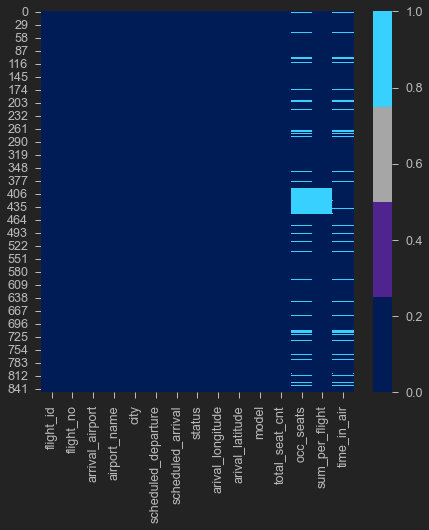

In [7]:
# Plot missing values
cols = df.columns
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

# Show in percents
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {round(pct_missing*100)}%')

---

 - Data set has 849 entries, 15 columns.
 - Column 'occ_seats' has 14.0% of missing values
 - Column 'sum_per_flight' has 7.0% of missing values
 - Column 'time_in_air' has 8.0% of missing values
---

<a id="sec2"></a>
# [2. Exploratory Data Analysis](#sec2)

In [ ]:
df['model'].unique()

Our dataset has only two types of aircrafts. Let's add for them the fuel consumption

Note:Fuel consumption numbers depend upon a lot of factors including flight takeoff weight, flight time, cruising altitude and the like.

Read the numbers as ballpark figures.

Given in kg/hour

In [8]:
fuel_cons = {
   'Boeing 737-300':2400,
    'Sukhoi Superjet-100':1700
}

In [9]:
# add column with rated fuel consumption
df['rated_consum'] = df['model'].map(fuel_cons)

In [10]:
# Compute the actual fuel consumption and add it to new col
df['actual_consumption']=df['time_in_air']/60*df['rated_consum']

Let's insert an additional coefficient of fuel consumption. 
Assume that the aircraft consume an additional 4 kg of fuel per hour for each passenger with an average weight of 75 kg.

In [11]:
df['actual_consumption_pass'] = (df['time_in_air']/60 * (df['occ_seats']*4)) + df['actual_consumption']

Fine, now we have the fuel consumption considering the flight time and quantity of passengers on board.

Drop Auxilliary columns

In [13]:
cols_to_drop = ['rated_consum', 'actual_consumption']
df = df.drop(cols_to_drop, axis=1)

In [16]:
df.sample(3)

,flight_id,flight_no,arrival_airport,airport_name,city,scheduled_departure,scheduled_arrival,status,arival_longitude,arival_latitude,model,total_seat_cnt,occ_seats,sum_per_flight,time_in_air,actual_consumption_pass
816,136931,PG0480,EGO,Belgorod International Airport,Belgorod,2017-04-23T09:25:00Z,2017-04-23T10:15:00Z,Arrived,36.590099,50.643799,Sukhoi Superjet-100,97,96.0,759000.0,51.0,1771.400000
148,136263,PG0252,SVO,Sheremetyevo International Airport,Moscow,2016-09-29T10:05:00Z,2016-09-29T11:45:00Z,Arrived,37.414600,55.972599,Boeing 737-300,130,122.0,1787200.0,100.0,4813.333333
198,136313,PG0252,SVO,Sheremetyevo International Airport,Moscow,2017-05-11T10:05:00Z,2017-05-11T11:45:00Z,Arrived,37.414600,55.972599,Boeing 737-300,130,109.0,1579800.0,102.0,4821.200000


In [17]:
sns.lineplot(x='scheduled_departue', y = 'sum_per_flight', data=df)
plt.xticks(rotation=15)
plt.title('seaborn-matplotlib example')
plt.show()

ValueError: Could not interpret input 'scheduled_departue'